In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"AirTraffic.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,US,Terminal 1,B,27271,2005,July
1,200507,ATA Airlines,TZ,US,Terminal 1,B,29131,2005,July
2,200507,ATA Airlines,TZ,US,Terminal 1,B,5415,2005,July
3,200507,Air Canada,AC,Canada,Terminal 1,B,35156,2005,July
4,200507,Air Canada,AC,Canada,Terminal 1,B,34090,2005,July


In [3]:
df1 = df.copy()
df1.duplicated().sum()

np.int64(32)

In [4]:
df1 = df1.drop_duplicates(keep='first')
df1.duplicated().sum()

np.int64(0)

In [5]:
df1 = df1.drop(columns = ['Activity Period','Operating Airline','Operating Airline IATA Code','Terminal','Boarding Area'])
df1.head()

,GEO Region,Passenger Count,Year,Month
0,US,27271,2005,July
1,US,29131,2005,July
2,US,5415,2005,July
3,Canada,35156,2005,July
4,Canada,34090,2005,July


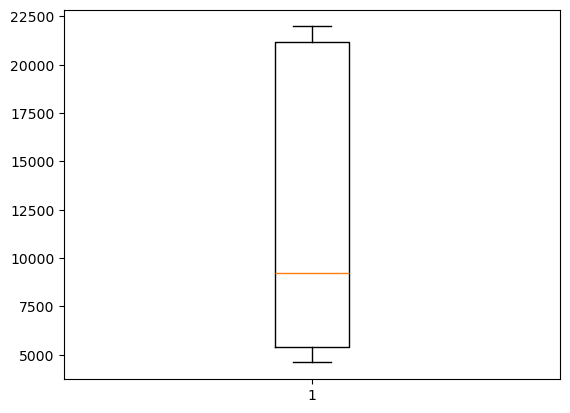

In [6]:
from feature_engine.outliers import Winsorizer
a = Winsorizer(capping_method = 'iqr',tail='both',fold = 0.05, variables = ['Passenger Count'])
df1 = a.fit_transform(df1)
plt.boxplot(df1['Passenger Count'])
plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder
b = OneHotEncoder(sparse_output = False)
encoded_df = b.fit_transform(df1[['GEO Region','Month']])
encdf = pd.DataFrame(encoded_df,columns = b.get_feature_names_out())
df1 = pd.concat([df1.drop(columns=['GEO Region','Month']),encdf],axis=1)
df1.head()

,Passenger Count,Year,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,21980.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21980.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5415.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21980.0,2005.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21980.0,2005.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()
df1 = c.fit_transform(df1)
scaled_df = pd.DataFrame(df1,columns= c.get_feature_names_out())
scaled_df.head()

,Passenger Count,Year,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,1.443831,-1.716318,-0.528553,-0.227515,-0.323160,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
1,1.443831,-1.716318,-0.528553,-0.227515,-0.323160,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
2,-0.936283,-1.716318,-0.528553,-0.227515,-0.323160,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
3,1.443831,-1.716318,-0.528553,-0.227515,3.094441,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
4,1.443831,-1.716318,-0.528553,-0.227515,3.094441,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935


In [9]:
scaled_df.isna().sum()
clean = scaled_df[~np.isnan(scaled_df).any(axis=1)]

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
db = DBSCAN(eps=0.1, min_samples=2)
y_pred = db.fit_predict(clean)
mb = pd.Series(y_pred)
silhouette = silhouette_score(clean,mb)
silhouette

np.float64(0.5562897069622855)